In [1]:
# print date
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2025-03-20 12:33:07


In [105]:
import xarray as xr
import dask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, glob, re, time, math, calendar
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, spearmanr, pearsonr
from matplotlib.colors import BoundaryNorm

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score as R2


# import custom functions
sys.path.append('/')
from libraries import *
from plotters import *

import os
import socket

# Get the current system's hostname or username
hostname = socket.gethostname()  # Get system hostname
username = os.getlogin()  # Get logged-in username

# Set FIGDIR based on the system
if username == 'harishbaki':  # macOS system
    FIGDIR = '/Users/harishbaki/Dropbox/Apps/Overleaf/Wind_Energy_Chebyshev_based_wind_profile_evaluaiton'
else:  # Assume Linux system
    FIGDIR = '/home/harish/Dropbox/Apps/Overleaf/Wind_Energy_Chebyshev_based_wind_profile_evaluaiton'

print(f"FIGDIR is set to: {FIGDIR}")


FIGDIR is set to: /Users/harishbaki/Dropbox/Apps/Overleaf/Wind_Energy_Chebyshev_based_wind_profile_evaluaiton


In [3]:
profilers = pd.read_csv('data/profiler_locations.csv')
# Removing the 'PROF' in stid
profilers['stid'] = [profilers['stid'][i][5:] for i in range(len(profilers['stid']))]
profilers.rename(columns={'lat [degrees]': 'latitude [degrees]','lon [degrees]':'longitude [degrees]'}, inplace=True)
profilers

,stid,number,name,latitude [degrees],longitude [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ALB2,2018,Albany (ETEC),42.680440,-73.816240,95.00,Albany,Albany,NY,6.00,WNW,5,Hudson Valley,ALY,2024-03-28 00:00:00 UTC,NaN
1,ALBA,2003,Albany (Airport),42.751750,-73.811280,83.07,Albany,Colonie,NY,4.20,NNE,5,Hudson Valley,ALY,2017-09-01 00:00:00 UTC,NaN
2,BELL,2030,Belleville,43.788230,-76.117650,152.10,Jefferson,Belleville,NY,0.55,NNE,9,Great Lakes,BUF,2017-03-03 00:00:00 UTC,NaN
3,BRON,2026,Bronx,40.872481,-73.893522,59.31,Bronx,Bronx,NY,3.90,NW,5,Hudson Valley,OKX,2017-09-12 22:00:00 UTC,NaN
4,BUFF,2004,Buffalo,42.993590,-78.794610,185.39,Erie,Buffalo,NY,13.70,NNE,9,Great Lakes,BUF,2017-03-29 20:00:00 UTC,NaN
5,CHAZ,2029,Chazy,44.889000,-73.466340,74.29,Clinton,Chazy,NY,2.40,W,7,Champlain Valley,BTV,2017-03-02 16:30:00 UTC,NaN
6,CLYM,2019,Clymer,42.021430,-79.627460,457.45,Chautauqua,Clymer,NY,0.22,ENE,9,Great Lakes,BUF,2017-03-22 23:00:00 UTC,NaN
7,EHAM,2035,East Hampton,40.970394,-72.200940,22.97,Suffolk,East Hampton,NY,1.56,WNW,4,Coastal,OKX,2017-04-27 19:00:00 UTC,NaN
8,JORD,2027,Jordan,43.068747,-76.469993,129.46,Onondaga,Jordan,NY,0.45,NNE,10,Central Lakes,BGM,2016-11-21 17:57:00 UTC,NaN
9,OWEG,2052,Owego,42.024938,-76.253072,464.45,Tioga,Owego,NY,8.70,S,2,Eastern Plateau,BGM,2017-05-02 14:00:00 UTC,NaN


In [4]:
latex_table = (profilers.loc[[2,3,4,6,8,9,10,11,12,13,14,15,16],
                             ['stid','name','latitude [degrees]','longitude [degrees]','elevation [m]']]).to_latex(index=False,float_format="%.2f")

# Replace underscores in station names with '\_' for LaTeX compatibility
latex_table = latex_table.replace("_", r"\_")

# Define the fixed width for each column (adjust widths as needed)
fixed_width_latex_table = latex_table.replace("ll", "p{0.5cm}p{0.5cm}").replace("l", "p{0.5cm}", 1)

# create a latex table
print(latex_table)

\begin{tabular}{llrrr}
\toprule
stid & name & latitude [degrees] & longitude [degrees] & elevation [m] \\
\midrule
BELL & Belleville & 43.79 & -76.12 & 152.10 \\
BRON & Bronx & 40.87 & -73.89 & 59.31 \\
BUFF & Buffalo & 42.99 & -78.79 & 185.39 \\
CLYM & Clymer & 42.02 & -79.63 & 457.45 \\
JORD & Jordan & 43.07 & -76.47 & 129.46 \\
OWEG & Owego & 42.02 & -76.25 & 464.45 \\
QUEE & Queens & 40.73 & -73.82 & 52.89 \\
REDH & Red Hook & 42.00 & -73.88 & 72.85 \\
STAT & Staten Island & 40.60 & -74.15 & 34.43 \\
STON & Stony Brook & 40.92 & -73.13 & 55.10 \\
SUFF & Suffern & 41.13 & -74.09 & 191.87 \\
TUPP & Tupper Lake & 44.22 & -74.44 & 525.20 \\
WANT & Wantagh & 40.65 & -73.51 & 18.25 \\
\bottomrule
\end{tabular}



In [5]:
def hexbin_plotter(fig, gs, Y, pred, title, text_arg=None, text_loc=None, errors_to_show=[r'$R^2$', 'RMSE', 'MAE'], err_units=None,
                   xlabel=None, ylabel=None, xlims=None, ylims=None, colorbar=None, fontsize=14,xticks=None,yticks=None):
    '''
    Plots hexbin between true and predictions of Y
    fig: figure handle
    gs: grid spec handle
    Y: target (train or test or true) 
    pred: prediction from a model
    title: title of the figure
    text_arg: whether to add text within the plot or not
    xlabel_arg: some cases, the xlabel is not needed, this specifies that
    ylabel_arg: some cases, the ylabel is not needed, this specifies that 
    fontsize: font size for labels, title, and text
    '''
    # Calculate error metrics
    err_metrics = {
        'MAE': mae(Y, pred),
        'RMSE': np.sqrt(mse(Y, pred)),
        'MAPE': mape(Y, pred) * 100,
        r'$R^2$': R2(Y, pred)
    }

    ax_hexbin = fig.add_subplot(gs)
    hb = ax_hexbin.hexbin(np.squeeze(Y), np.squeeze(pred), gridsize=100, bins='log', cmap='inferno')

    if text_arg:
        error_lines = []
        for error in errors_to_show:
            if error in err_metrics:
                if error == r'$R^2$':
                    error_lines.append(f'{error:<7}: {err_metrics[error]:>4.2f} {err_units[error]}')  # Adjusted spacing
                else:
                    error_lines.append(f'{error:<4}: {err_metrics[error]:>4.2f} {err_units[error]}')
        error_text = '\n'.join(error_lines)

        ax_hexbin.text(text_loc[0], text_loc[1], error_text, transform=ax_hexbin.transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontfamily='monospace', fontsize=fontsize)

    # Apply fontsize to labels and title
    if xlabel:
        ax_hexbin.set_xlabel(xlabel, fontsize=fontsize)
    if ylabel:
        ax_hexbin.set_ylabel(ylabel, fontsize=fontsize)
    if xticks is None:
        ax_hexbin.set_xticks([])
    if yticks is None:
        ax_hexbin.set_yticks([])
    ax_hexbin.set_title(f'{title}', fontsize=fontsize)  # Slightly larger title

    ax_hexbin.tick_params(axis='both', which='major', labelsize=fontsize)

    # Adjust axis limits and add reference line
    if xlims and ylims:
        ax_hexbin.set_xlim(xlims[0], xlims[1])
        ax_hexbin.set_ylim(ylims[0], ylims[1])
        ax_hexbin.plot([xlims[0], xlims[1]], [ylims[0], ylims[1]], 'k--')
    else:
        min_value = Y.min()
        max_value = Y.max()
        ax_hexbin.set_xlim(min_value, max_value)
        ax_hexbin.set_ylim(min_value, max_value)
        ax_hexbin.plot([min_value, max_value], [min_value, max_value], 'k--')

    return hb

# Chebyshev polynomials

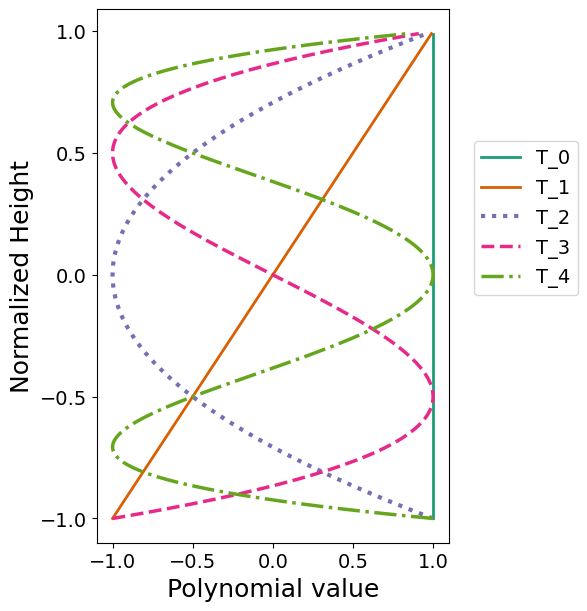

In [6]:

x = np.arange(-1, 1, 0.01)
CPtype = 1
CP = Chebyshev_Basu(x, 4, CPtype)
p = 4
# Colorblind-friendly colors
colors = ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#56B4E9']
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
def chebyshev_polynomials_plotter(gs):
    ax = fig.add_subplot(gs)
    
    ax.plot(CP[:, 0], x, linestyle='-', linewidth=2,label='T_0', color=colors[0])
    ax.plot(CP[:, 1], x, linestyle='-', linewidth=2,label='T_1', color=colors[1])
    ax.plot(CP[:, 2], x, linestyle=':', linewidth=3,label='T_2', color=colors[2])
    ax.plot(CP[:, 3], x, linestyle='--', linewidth=2.5,label='T_3', color=colors[3])
    ax.plot(CP[:, 4], x, linestyle='-.', linewidth=2.5,label='T_4', color=colors[4])
    
    #ax.legend(['T_0', 'T_1', 'T_2', 'T_3', 'T_4'], loc='upper right', fontsize=14)
    #ax.set_xlabel('Coefficients', fontsize=18)
    ax.set_ylabel('Normalized Height', fontsize=18)
    ax.set_xlabel('Polynomial value', fontsize=18)
    #ax.set_title('Chebyshev Polynomials', fontsize=18)
    # Set ticks
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    # Set tick font size
    ax.tick_params(axis='both', which='major', labelsize=14)
    #ax.grid(True)

    return ax

fig = plt.figure(figsize=(8, 6), constrained_layout=True)
gs = fig.add_gridspec(1,2)
axs = chebyshev_polynomials_plotter(gs[0,0])
# Extract legend from one of the subplots
handles, labels = axs.get_legend_handles_labels()
# Create a common legend below the figures
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(0.65, 0.5),fontsize=14)

plt.savefig(f'{FIGDIR}/Chebyshev_Polynomials.pdf', dpi=300, bbox_inches='tight')

# Plotting well-known profiles

In [35]:
def profle_plotter(gs,Z,M,title,xlabel=None,ylabel=None,legend=None,text_loc=None,xlims=[0, 21],ylims=[0, 500],xticks=None,yticks=None):
    ax = fig.add_subplot(gs)
    ChSh = Chebyshev_Coeff(Z,M, poly_order=poly_order, CPtype=1, ref_H=Z)
    Mp = WindProfile(Z, ChSh, poly_order=poly_order, CPtype=1, ref_H=Z)
    ax.plot(M, Z, 'or', markerfacecolor='r',label='Observed profile')
    ax.plot(Mp, Z, '-k', linewidth=2,label='Chebyshev modelled profile')

    mean_M = np.mean(M)
    mean_Mp = np.mean(Mp)

    if text_loc:
        ax.text(text_loc[0], text_loc[1], rf'$\overline{{U}}$: {mean_M:.2f} m/s'
            f'\nC0 = {ChSh[0]:.2f} \nC1 = {ChSh[1]:.2f}'
            f'\nC2 = {ChSh[2]:.2f} \nC3 = {ChSh[3]:.2f} \nC4 = {ChSh[4]:.2f}',
                      transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),fontsize=15)

    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.tick_params(labelsize=18)
    ax.set_title(title,fontsize=18)
    if xlabel:
        ax.set_xlabel(xlabel,fontsize=18)
    if ylabel:
        ax.set_ylabel(ylabel,fontsize=18)
    if legend:
        ax.legend(fontsize=18)
    if xticks is not None:
        ax.set_xticks(xticks)
    else:
        ax.set_xticks([0,5,10,15,20])  # Explicitly remove x-ticks if None
        ax.set_xticklabels([])  # Explicitly remove x-ticks if None

    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        ax.set_yticks([10,100,200,300,400,500])
        ax.set_yticklabels([])  # Explicitly remove y-ticks if None

    return ax

## Leipzig

In [8]:
# read Leipzig.dat file
Leipzig = pd.read_csv('data/Leipzig/Leipzig.dat', sep='\s+', header=None)
# compute wind speed by taking square root of sum of squares of 2nd and 3rd columns, and add it as a new column
Leipzig['WS'] = np.sqrt(Leipzig.iloc[:,1]**2 + Leipzig.iloc[:,2]**2)
target_index = Leipzig[Leipzig.iloc[:, 0] == 500].index[0]
# Select all rows up to and including the row where the height reaches 100 m
Leipzig = Leipzig.iloc[:target_index + 1]

## Wangara

In [9]:
# read Leipzig.dat file
Wangara_1 = pd.read_csv('data/Wangara_ASCII/Wangara_UV3318.txt', sep='\s+', header=None, skiprows=1)
# compute wind speed by taking square root of sum of squares of 2nd and 3rd columns, and add it as a new column
Wangara_1['WS'] = np.sqrt(Wangara_1.iloc[:,1]**2 + Wangara_1.iloc[:,2]**2)
target_index = Wangara_1[Wangara_1.iloc[:, 0] == 500].index[0]
# Select all rows up to and including the row where the height reaches 100 m
Wangara_1 = Wangara_1.iloc[:target_index + 1]

Wangara_2 = pd.read_csv('data/Wangara_ASCII/Wangara_UV3403.txt', sep='\s+', header=None, skiprows=1)
# compute wind speed by taking square root of sum of squares of 2nd and 3rd columns, and add it as a new column
Wangara_2['WS'] = np.sqrt(Wangara_2.iloc[:,1]**2 + Wangara_2.iloc[:,2]**2)
target_index = Wangara_2[Wangara_2.iloc[:, 0] == 500].index[0]
# Select all rows up to and including the row where the height reaches 100 m
Wangara_2 = Wangara_2.iloc[:target_index + 1]

## Hovsore

In [12]:
files = [f'data/Hovsore_TallWind/case{i}_wind.txt' for i in range(1, 11)]
Hovsore = {}
for i,file in enumerate(files):
    df = pd.read_csv(file, sep='\s+', header=None,skiprows=1)
    # compute wind speed by taking square root of sum of squares of 2nd and 3rd columns, and add it as a new column
    df['WS'] = np.sqrt(df.iloc[:,1]**2 + df.iloc[:,2]**2)
    target_index = df[df.iloc[:, 0] == 500].index[0]
    # Select all rows up to and including the row where the height reaches 100 m
    df = df.iloc[:target_index + 1]
    Hovsore[f'case{i+1}'] = df

## Wantagh

In [13]:
profiler_profiles_ds = xr.open_dataset(f'data/NYSM_standard_and_profiler_combined_wind_speed/zeroth_method/PROF_WANT.nc').wind_speed
Wantagh1 = profiler_profiles_ds.sel(range=slice(10,500),time='2021-06-27T21:00').values
Wantagh2 = profiler_profiles_ds.sel(range=slice(10,500),time='2020-07-22T21:00').values

## Combine plots

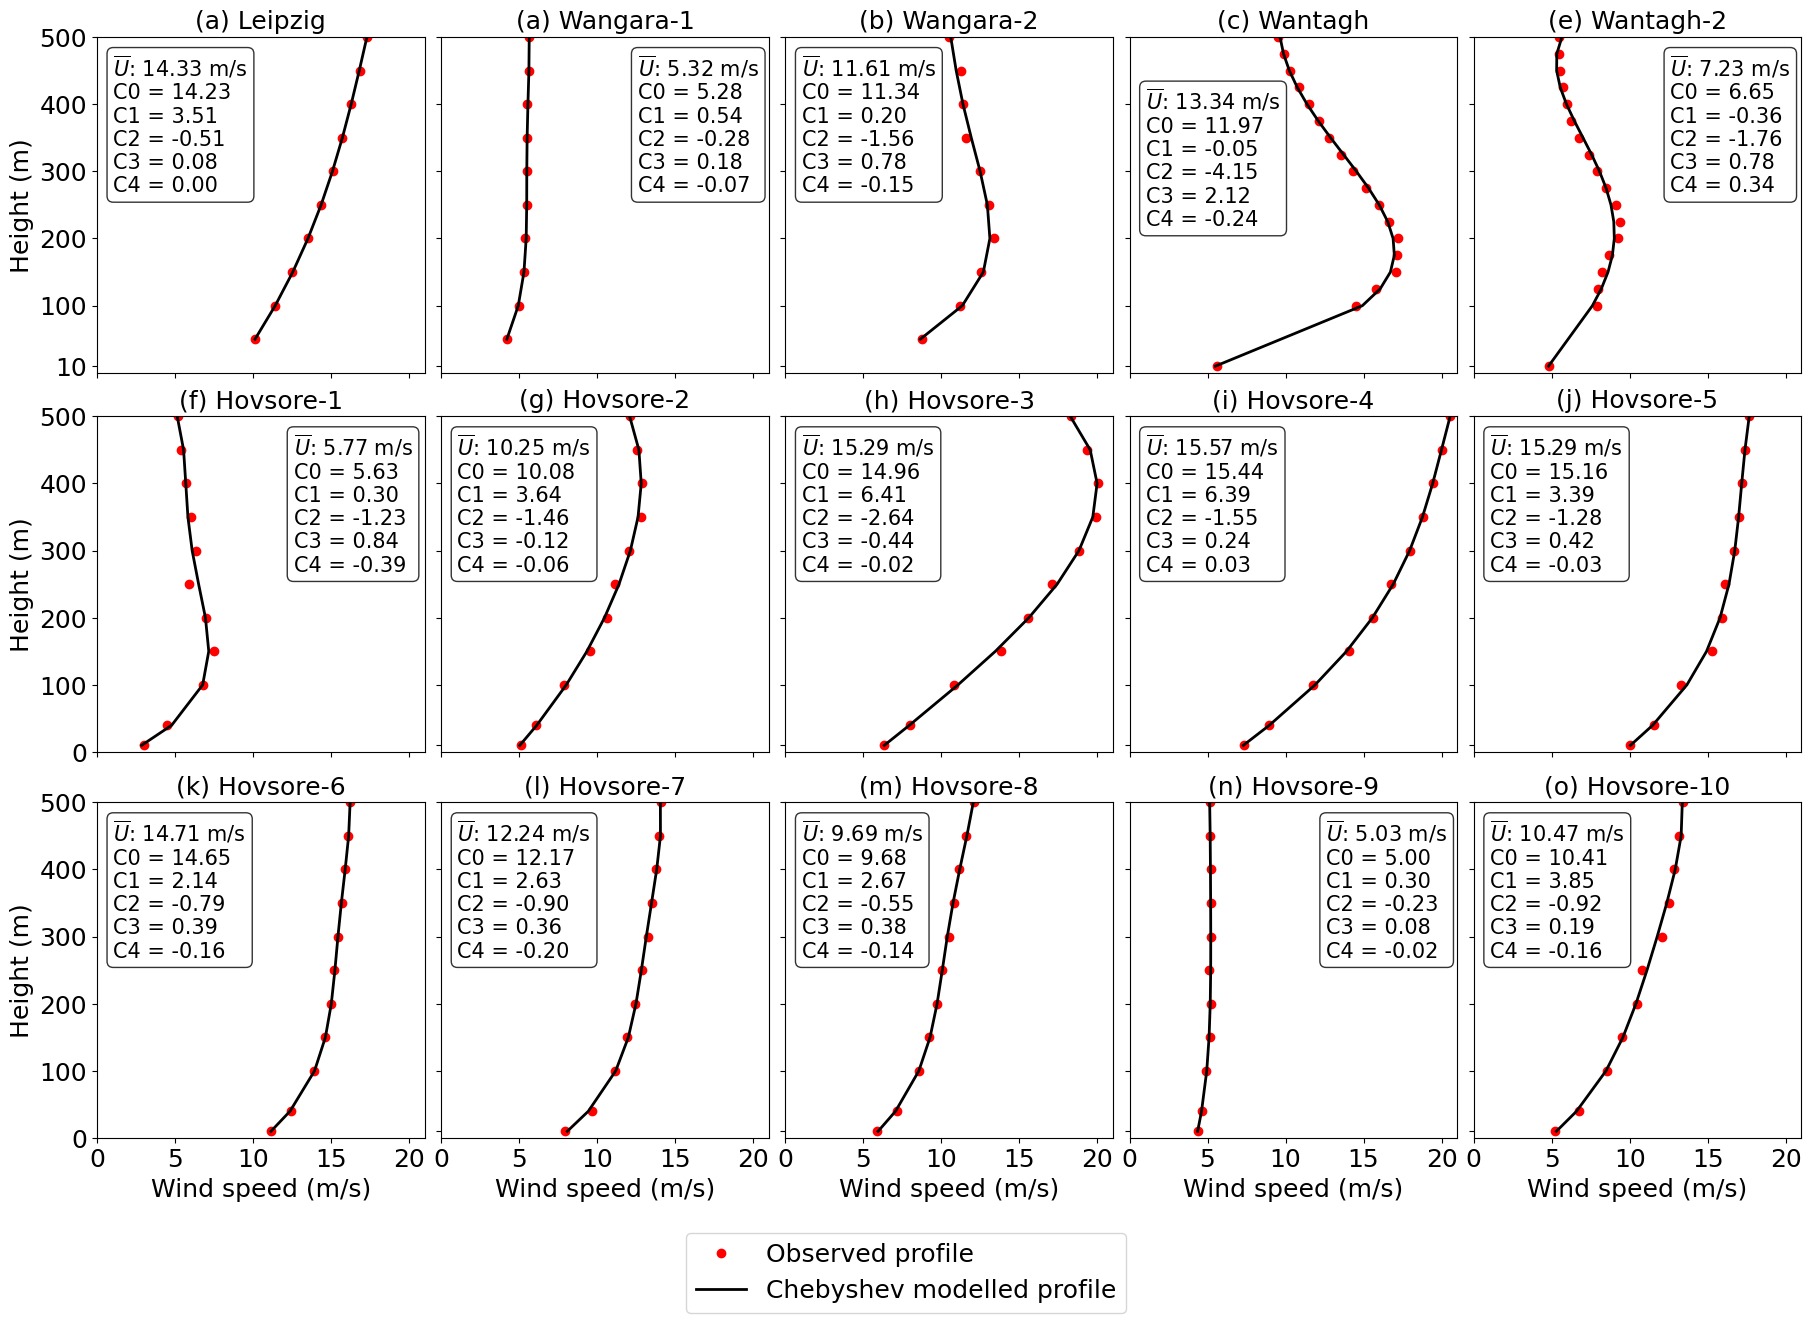

In [39]:
files = [f'data/Hovsore_TallWind/case{i}_wind.txt' for i in range(1, 11)]
fig = plt.figure(figsize=(18, 12), constrained_layout=True)
gs = fig.add_gridspec(3,5)
text_loc1 = [0.55, 0.35]
xticks = None
yticks = [10, 100, 200, 300, 400, 500]
axs = profle_plotter(gs[0,0], Leipzig[0].values, Leipzig['WS'].values, '(a) Leipzig', xlabel='', ylabel='Height (m)',text_loc=[0.05, 0.95],xticks=xticks,yticks=yticks)
yticks = None
axs = profle_plotter(gs[0,1], Wangara_1[0].values, Wangara_1['WS'].values, '(a) Wangara-1', xlabel='', ylabel='',text_loc=[0.6, 0.95],xticks=xticks,yticks=yticks)
axs = profle_plotter(gs[0,2], Wangara_2[0].values, Wangara_2['WS'].values, '(b) Wangara-2', xlabel='', ylabel='',text_loc=[0.05, 0.95],xticks=xticks,yticks=yticks)
axs = profle_plotter(gs[0,3], profilers_levels, Wantagh1, '(c) Wantagh', xlabel='', ylabel='',text_loc=[0.05, 0.85],xticks=xticks,yticks=yticks)
axs = profle_plotter(gs[0,4], profilers_levels, Wantagh2, '(e) Wantagh-2', xlabel='', ylabel='',text_loc=[0.6, 0.95],xticks=xticks,yticks=yticks)

chars = ['(f)', '(g)', '(h)', '(i)', '(j)','(k)','(l)','(m)','(n)','(o)']
for j,i in enumerate(np.arange(1,11,1)):
    row,col = divmod(j,5)
    row = row +1
    yticks = [0, 100, 200, 300, 400, 500] if col == 0 else None
    xticks = [0, 5, 10, 15, 20] if row == 2 else None
    xlabel = 'Wind speed (m/s)' if row == 2 else None
    ylabel = 'Height (m)' if col == 0 else None

    if (row==1 and col==0) or (row==2 and col==3):
        text_loc = [0.6, 0.95]
    else:
        text_loc = [0.05, 0.95]
    axs = profle_plotter(gs[row,col], Hovsore[f'case{i}'][0].values, Hovsore[f'case{i}']['WS'].values, f'{chars[j]} Hovsore-{i}', xlabel=xlabel, ylabel=ylabel,text_loc=text_loc,xticks=xticks,yticks=yticks)
# Extract legend from one of the subplots
handles, labels = axs.get_legend_handles_labels()
# Create a common legend below the figures
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.1),fontsize=18)
plt.savefig(f'{FIGDIR}/Standard_Leipzig_Wangara_Hovsore_WindProfiles.pdf', dpi=300, bbox_inches='tight')


# Lidar vs NOW23

In [85]:
test_station_ids = ['PROF_CLYM','PROF_OWEG','PROF_STAT','PROF_STON','PROF_QUEE','PROF_SUFF','PROF_BUFF','PROF_BELL','PROF_TUPP',
                    'PROF_WANT','PROF_BRON','PROF_REDH','PROF_JORD']
test_dates_range = ('2018-01-01T00:00:00', '2020-12-31T23:00:00')

profiler_coeff_all, NOW23_coeff_all = {},{}
profiler_profiles_all, NOW23_profiles_all = {},{}
for station_id in test_station_ids:
    profiler_ds  = xr.open_dataset(f'data/Profiler_Chebyshev_Coefficients/zeroth_method/{station_id}.nc')
    profiler_data = profiler_ds.Chebyshev_Coefficients.sel(time=slice('2018-01-01T00',f'2020-12-31T23'))
    # Extracting non_missing and excluding outliers
    profiler_data = profiler_data.where(profiler_data.non_missing_outlier==1, drop=True)

    NOW23_ds = xr.open_dataset(f'data/NOW23_Chebyshev_Coefficients/zeroth_method/{station_id}.nc')
    NOW23_data = NOW23_ds.Chebyshev_Coefficients.sel(time=slice('2018-01-01T00',f'2020-12-31T23'))
    NOW23_data = NOW23_data.sel(time=profiler_data.time.values)
    profiler_coeff_all[station_id] = profiler_data
    NOW23_coeff_all[station_id] = NOW23_data

    # true profiler and NOW23 data
    profiler_profiles_ds = xr.open_dataset(f'data/NYSM_standard_and_profiler_combined_wind_speed/zeroth_method/{station_id}.nc').wind_speed
    NOW23_profiles_ds = xr.open_dataset(f'data/NOW23_profiles/zeroth_method/{station_id}.nc').wind_speed

    profiler_profiles = profiler_profiles_ds.sel(range=slice(10,500),time=profiler_data.time.values).T
    profiler_profiles = profiler_profiles.rename({'range':'levels'})
    NOW23_profiles = NOW23_profiles_ds.sel(time=profiler_data.time.values)
    profiler_profiles_all[station_id] = profiler_profiles
    NOW23_profiles_all[station_id] = NOW23_profiles

    print(f'{station_id} processed', profiler_data.time.size, NOW23_data.time.size, profiler_profiles.time.size, NOW23_profiles.time.size)

PROF_CLYM processed 58453 58453 58453 58453
PROF_OWEG processed 85416 85416 85416 85416
PROF_STAT processed 74486 74486 74486 74486
PROF_STON processed 61060 61060 61060 61060
PROF_QUEE processed 81728 81728 81728 81728
PROF_SUFF processed 27599 27599 27599 27599
PROF_BUFF processed 54258 54258 54258 54258
PROF_BELL processed 41997 41997 41997 41997
PROF_TUPP processed 53690 53690 53690 53690
PROF_WANT processed 95547 95547 95547 95547
PROF_BRON processed 90262 90262 90262 90262
PROF_REDH processed 74952 74952 74952 74952
PROF_JORD processed 80247 80247 80247 80247


## Wind speed profiles comparison

In [86]:
# combine the coefficient data
profiler_profiles_combined = xr.concat([profiler_profiles_all[station_id] for station_id in test_station_ids], dim='time')
NOW23_profiles_combined = xr.concat([NOW23_profiles_all[station_id] for station_id in test_station_ids], dim='time')

In [121]:
coastal_sites = ['PROF_BUFF','PROF_BELL','PROF_STAT','PROF_STON','PROF_QUEE','PROF_WANT','PROF_BRON']
inland_sites = ['PROF_CLYM','PROF_OWEG','PROF_SUFF','PROF_TUPP','PROF_REDH','PROF_JORD']
common_levels = np.intersect1d(profiler_profiles_all['PROF_BUFF'].levels.values, NOW23_profiles_all['PROF_BUFF'].levels.values)
def vertical_profile_plotter(ax,data,levels,label,title=None,xlabel=None,ylabel=None,
                             xlim=None, ylim=None,xticks=None,xtick_labels=True,yticks=None,ytick_labels=True,fontsize=16):
    ax.plot(data, levels, label=label)
    ax.tick_params(labelsize=fontsize)
    ax.set_title(title,fontsize=fontsize)
    if xlabel:
        ax.set_xlabel(xlabel,fontsize=fontsize)
    if ylabel:
        ax.set_ylabel(ylabel,fontsize=fontsize)
    #ax.set_xticks(xticks)
    if not xtick_labels:
        ax.set_xticklabels([])  # Explicitly remove x-ticks if None
    ax.set_yticks(yticks)
    if not ytick_labels:
        ax.set_yticklabels([])  # Explicitly remove y-ticks if None
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    return ax

def weibull_scale(data):
    shape, loc, scale = weibull_min.fit(data, floc=0)
    return scale

def weibull_shape(data):
    shape, loc, scale = weibull_min.fit(data, floc=0)
    return shape

In [ ]:
conventional_statistics = {}
for station_id in test_station_ids:
    prof_values = profiler_profiles_all[station_id]
    now_values = NOW23_profiles_all[station_id]
    conventional_statistics[station_id] = {
        'mean': {'profiler': prof_values.mean(dim='time'), 
                'now': now_values.mean(dim='time')},
        'scale': {'profiler':xr.apply_ufunc(weibull_scale, prof_values,input_core_dims=[["time"]],vectorize=True,),
                'now':xr.apply_ufunc(weibull_scale, now_values,input_core_dims=[["time"]],vectorize=True)},
        'shape': {'profiler':xr.apply_ufunc(weibull_shape, prof_values,input_core_dims=[["time"]],vectorize=True,),
                'now':xr.apply_ufunc(weibull_shape, now_values,input_core_dims=[["time"]],vectorize=True)}
    }
    prof_values = prof_values.sel(levels=common_levels)
    now_values = now_values.sel(levels=common_levels)
    conventional_statistics[station_id].update({
        'bias': (prof_values - now_values).mean(dim='time'),
        'rmse': xr.apply_ufunc(RMSE, prof_values, now_values,input_core_dims=[["time"], ["time"]],vectorize=True,),
        'r2': xr.apply_ufunc(R2, prof_values, now_values,input_core_dims=[["time"], ["time"]],vectorize=True,),
    })

# save the conventional statistics to file
conventional_statistics_ds = xr.Dataset(conventional_statistics)


<Axes: title={'center': 'PROF_BUFF'}, ylabel='Height (m)'>

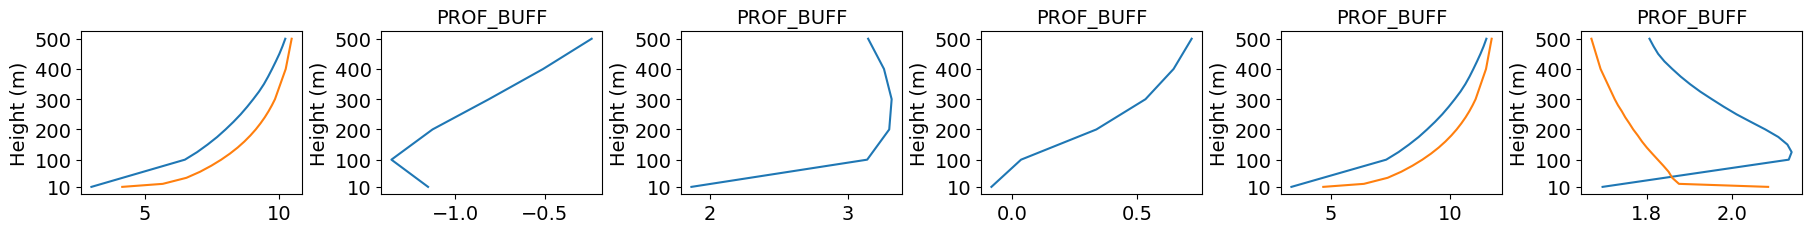

In [120]:
fig = plt.figure(figsize=(18, 12), constrained_layout=True)
gs = fig.add_gridspec(len(coastal_sites),6)

ax = fig.add_subplot(gs[0,0])
data = conventional_statistics[station_id]['mean']['profiler']
vertical_profile_plotter(ax,data,data.levels,'Lidar',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)
data = conventional_statistics[station_id]['mean']['now']
vertical_profile_plotter(ax,data,data.levels,'NOW23',
                               xlabel='',ylabel='',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)

ax = fig.add_subplot(gs[0,1])
data = conventional_statistics[station_id]['bias']
vertical_profile_plotter(ax,data,data.levels,'Bias',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)

ax = fig.add_subplot(gs[0,2])
data = conventional_statistics[station_id]['rmse']
vertical_profile_plotter(ax,data,data.levels,'RMSE',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)

ax = fig.add_subplot(gs[0,3])
data = conventional_statistics[station_id]['r2']
vertical_profile_plotter(ax,data,data.levels,'RMSE',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)

ax = fig.add_subplot(gs[0,4])
data = conventional_statistics[station_id]['scale']['profiler']
vertical_profile_plotter(ax,data,data.levels,'scale',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)
data = conventional_statistics[station_id]['scale']['now']
vertical_profile_plotter(ax,data,data.levels,'scale',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)

ax = fig.add_subplot(gs[0,5])
data = conventional_statistics[station_id]['shape']['profiler']
vertical_profile_plotter(ax,data,data.levels,'shape',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)
data = conventional_statistics[station_id]['shape']['now']
vertical_profile_plotter(ax,data,data.levels,'scale',title=station_id,
                               xlabel='',ylabel='Height (m)',xticks=[0,5,10,15,20],xtick_labels=True,yticks=[10,100,200,300,400,500],ytick_labels=True,fontsize=14)